In [1]:
from exploration.imports import * # pd, np, plt, sns

In [2]:
df = pd.read_parquet("data/train.parquet")
df

0    1    2    3    4    5    6    7    8    9    ...  \
id    number direction                                                    ...   
0     5      dx           1    1    0    1    1    1    1    0    1    1  ...   
             dy           0    0   -1    0    0    0    0   -1    0    0  ...   
1     0      dx           0   -1    0    0    0    0    0    0    1    1  ...   
             dy           1    1    1    1    1    1    1    1    0    0  ...   
2     4      dx           0    0    0    0   -1    0    1    1    1    1  ...   
...                     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
59996 3      dy          -1    0    0    0    1    0    1    1    1    1  ...   
59997 5      dx          -1   -1   -1   -1   -1   -1   -1   -1   -1   -1  ...   
             dy           1    0    0    0    1    0    0    1    0    1  ...   
59998 6      dx          -1   -1   -1    0   -1    0   -1   -1    0   -1  ...   
             dy           1    1    1    1    0    1    0    1    1    0  ...   

                        105  106  107  108  109  110  111  112  113  114  
id    number direction                                                    
0     5      dx         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
             dy         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1     0      dx         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
             dy         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2     4      dx         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...                     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
59996 3      dy         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
59997 5      dx         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
             dy         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
59998 6      dx         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
             dy         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[119998 rows x 115 columns]

In [3]:
stroke = df.loc[0].dropna(axis=1)
stroke

0   1   2   3   4   5   6   7   8   9   ...   34   35   36  \
number direction                                          ...                  
5      dx          1   1   0   1   1   1   1   0   1   1  ...  0.0 -1.0 -1.0   
       dy          0   0  -1   0   0   0   0  -1   0   0  ...  1.0  0.0  0.0   

                   37   38   39   40   41   42   43  
number direction                                     
5      dx         0.0 -1.0 -1.0 -1.0  0.0 -1.0 -1.0  
       dy         1.0  0.0  0.0  0.0  1.0  0.0  0.0  

[2 rows x 44 columns]

In [4]:
reconstructed_data = np.cumsum(stroke, axis=1) + 4
reconstructed_data = reconstructed_data.astype(int)
reconstructed_data = reconstructed_data.to_numpy()
reconstructed_data

array([[ 5,  6,  6,  7,  8,  9, 10, 10, 11, 12, 13, 14, 15, 15, 11, 11,
         6,  6,  6,  7,  7,  8,  9, 10, 11, 11, 12, 11, 11, 10,  9,  9,
         8,  7,  7,  6,  5,  5,  4,  3,  2,  2,  1,  0],
       [ 4,  4,  3,  3,  3,  3,  3,  2,  2,  2,  2,  2,  1,  1,  4,  4,
         5,  6,  7,  8,  9,  9, 10, 11, 11, 12, 13, 14, 15, 15, 15, 16,
        16, 16, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19]])

In [5]:
image = np.zeros((50, 50))

In [6]:
for loc in reconstructed_data.T:
    image[loc[0] + 10, loc[1] + 10] = 1

<Axes: >

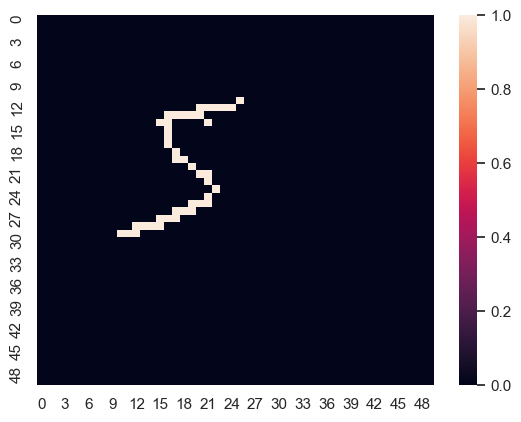

In [8]:
sns.heatmap(image.T)

<Axes: ylabel='number-direction'>

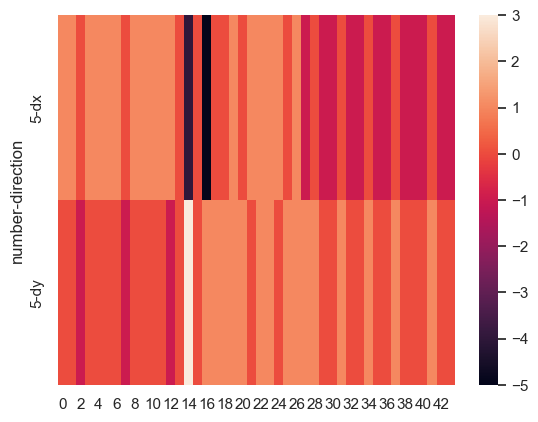

In [9]:
sns.heatmap(stroke)